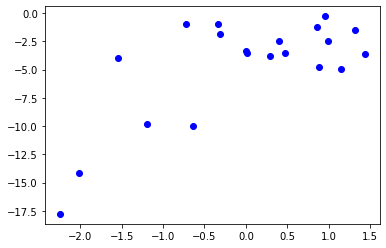

In [102]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import random
import numpy as np

random.seed(1234)

x= np.random.normal(0,1,20)
y=x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

plt.scatter(x,y,color='blue')

In [103]:
linreg=LinearRegression()

#creating another coloumn for the x,y values as linermodel requires 2 d array n_sample,n_features we can apply reshape(-1,1) but it is easy to add another col
x=x[:,np.newaxis]
y=y[:,np.newaxis]
x=x.reshape(-1,1)
linreg.fit(x,y)
y_pred=linreg.predict(x)

from sklearn.metrics import r2_score,mean_squared_error

print("r2 score is : ",r2_score(y,y_pred))
print("mean Squared error is : ",mean_squared_error(y,y_pred))# HOLY SHIT  34625644139224.89



r2 score is :  0.4993416150154636
mean Squared error is :  10.24135374416818


r2 score is :  0.7232261955772583
mean Squared error is :  5.6616218228324815


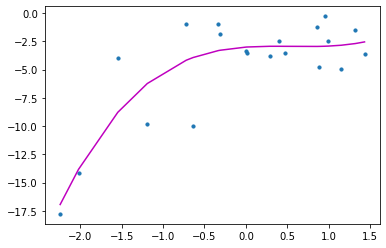

In [104]:
#thats why when a polynomial relation is present we should always look for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
import operator
polynomial_features=PolynomialFeatures(degree=3)
x_polyfit=polynomial_features.fit_transform(x)

linreg.fit(x_polyfit,y)

y_poly_pred=linreg.predict(x_polyfit)

print("r2 score is : ",r2_score(y,y_poly_pred))
print("mean Squared error is : ",mean_squared_error(y,y_poly_pred))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)#just copied this from some site for the proper plotting
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')


enter the degree3
r2 score is :  0.049781875888179394
mean Squared error is :  19.437445242127787


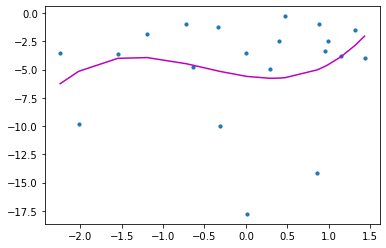

In [105]:
#now lets create a function for the degree fitting

degree=int(input("enter the degree"))

polynomial_features=PolynomialFeatures(degree)

poly_x_degree=polynomial_features.fit_transform(x,y)

linreg=LinearRegression()
linreg.fit(poly_x_degree,y)

poly_pred_y=linreg.predict(poly_x_degree)
    
print("r2 score is : ",r2_score(y,poly_pred_y))
print("mean Squared error is : ",mean_squared_error(y,poly_pred_y))

#plotting 
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)#just copied this from some site for the proper plotting
sorted_zip = sorted(zip(x,poly_pred_y), key=sort_axis)
x, poly_pred_y = zip(*sorted_zip)
plt.plot(x, poly_pred_y, color='m')
    

